<a href="https://colab.research.google.com/github/Yashi1006/CNN-Image-Classifier/blob/main/CNNImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import os

In [ ]:
os.path.join('data' , 'happy')

'data/happy'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ImageClassification.zip to ImageClassification.zip


In [ ]:
import zipfile
import os

# Define the zip file path
zip_path = '/content/ImageClassification.zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# Check if the folder is extracted
os.listdir('/content/dataset')


['ImageClassification']

In [ ]:
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np
import os

data_dir = 'content/dataset/ImageClassification'
image_extsn = ['jpeg' , 'jpg' , 'bmp' , 'png']

# Use the print function to check if the path is correct and if the file exists
print(os.path.exists(os.path.join(data_dir, 'happy', '1902539.jpg')))

img = cv2.imread(os.path.join(data_dir , 'happy' , '1902539.jpg'))

# Check if the image was loaded correctly.
if img is not None:
    plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print('Image not loaded correctly')

False
Image not loaded correctly


In [ ]:
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np
import os

# Updated path to the image directory - Added a leading '/'
data_dir = '/content/dataset/ImageClassification'
image_extsn = ['jpeg' , 'jpg' , 'bmp' , 'png']


for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir , image_class)):
    image_path = os.path.join(data_dir , image_class , image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_extsn:
        print('Image not in the list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))
      #os.remove(image_path)

Image not in the list /content/dataset/ImageClassification/happy/kiGH9ukZK6Q4hvtDtwwVc1yvueg.svg
Image not in the list /content/dataset/ImageClassification/happy/It9Rrm02rE20.jpg
Image not in the list /content/dataset/ImageClassification/happy/427394C200000578-0-image-a-24_1500384481554.jpg
Image not in the list /content/dataset/ImageClassification/sad/ODF.OTWJk1xWx9LlWBdoF478uA.jpg
Image not in the list /content/dataset/ImageClassification/sad/kiGH9ukZK6Q4hvtDtwwVc1yvueg.svg


In [ ]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/dataset/ImageClassification')

Found 272 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

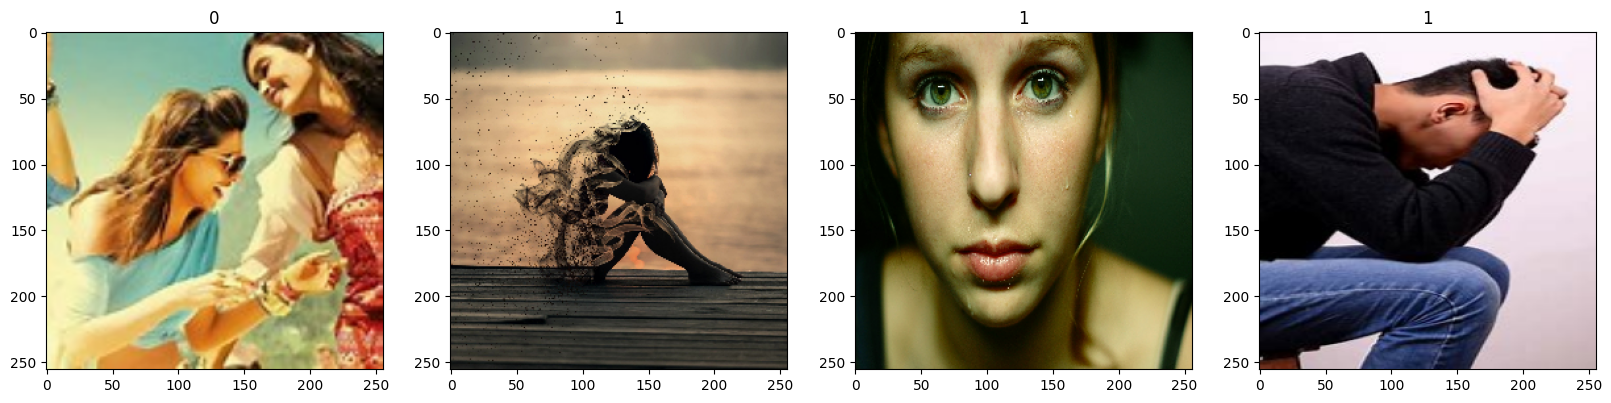

In [ ]:
fig, ax = plt.subplots(ncols=4 , figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[9.01960790e-01, 8.70588243e-01, 8.27450991e-01],
          [9.01960790e-01, 8.78431380e-01, 8.31372559e-01],
          [9.03339446e-01, 8.75888467e-01, 8.36672783e-01],
          ...,
          [8.43137264e-01, 8.31372559e-01, 8.03921580e-01],
          [8.31372559e-01, 8.19117665e-01, 7.91911781e-01],
          [8.11764717e-01, 8.00000012e-01, 7.65686274e-01]],
 
         [[9.01960790e-01, 8.70588243e-01, 8.19607854e-01],
          [9.00765955e-01, 8.77236545e-01, 8.30177724e-01],
          [9.02941167e-01, 8.79901946e-01, 8.39215696e-01],
          ...,
          [8.39215696e-01, 8.27450991e-01, 8.00000012e-01],
          [8.25459540e-01, 8.13694835e-01, 7.86243856e-01],
          [8.11274529e-01, 7.99509823e-01, 7.72058845e-01]],
 
         [[9.00888503e-01, 8.69515955e-01, 8.18535566e-01],
          [9.01960790e-01, 8.78431380e-01, 8.31372559e-01],
          [9.00245070e-01, 8.77205908e-01, 8.36519599e-01],
          ...,
          [8.39981616e-01, 8.28216910e-01, 8.0076

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

6

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5134 - loss: 0.6962 - val_accuracy: 0.7188 - val_loss: 0.6441
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.7661 - loss: 0.6166 - val_accuracy: 0.5625 - val_loss: 0.6251
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.6150 - loss: 0.6214 - val_accuracy: 0.8125 - val_loss: 0.3722
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.8026 - loss: 0.4238 - val_accuracy: 0.8438 - val_loss: 0.2977
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.8126 - loss: 0.3741 - val_accuracy: 0.9375 - val_loss: 0.2228
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.8856 - loss: 0.2785 - val_accuracy: 0.9375 - val_loss: 0.1670
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9201 - loss: 0.2002 - val_accuracy: 1.0000 - val_loss: 0.0997
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9350 - loss: 0.1909 - val_accuracy: 0.9375 - val_loss: 0.1500
Epoch 9/

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

In [ ]:
import cv2

In [ ]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

In [ ]:
array([[0.01972741]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))